In [83]:
import os
import pandas as pd
from glob import glob 
import scipy.signal
import numpy as np
import librosa
import matplotlib.pyplot as plt
import librosa.display
from scipy.signal import butter, lfilter
%matplotlib inline

# BandPass Function

In [84]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


In [85]:
data, sr = librosa.load('validation/a0001.wav', 1000) #samplerate =1000

data

array([-0.00215853, -0.00328316, -0.00059597, ..., -0.01270812,
       -0.01098489, -0.00752986], dtype=float32)

In [86]:
fs = 1000.0
lowcut = 20.0
highcut = 450.0

newData = butter_bandpass_filter(data, lowcut, highcut, fs) #implementing bandpass filter

In [87]:
newData

array([-1.05187632e-03, -2.24435751e-03,  1.57698480e-05, ...,
        1.37757499e-03,  2.31099985e-03,  4.24114357e-03])

In [88]:
MF = np.mean(data)/np.max(data)

In [89]:
MFN = np.mean(newData)/np.max(newData)

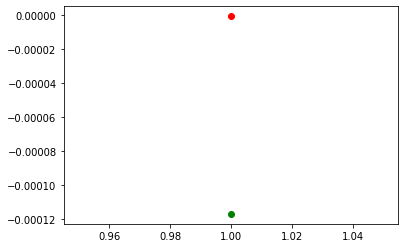

In [90]:
plt.plot(1, MF, 'o', color='green')
plt.plot(1, MFN, 'o', color='red')
plt.show()

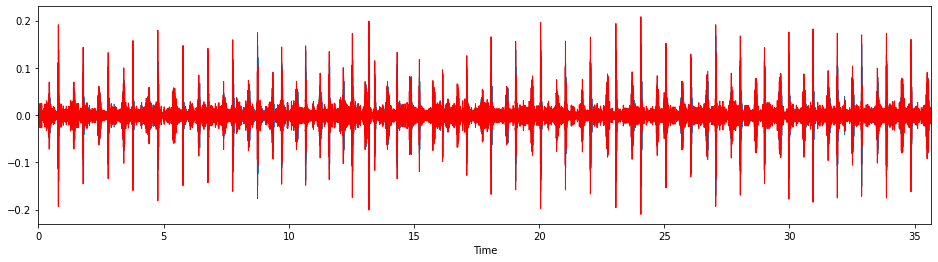

In [91]:
plt.figure(figsize=(16, 4))
librosa.display.waveplot(newData, sr=1000)
librosa.display.waveplot(data, color='r', sr=1000)

# Fourier Transform

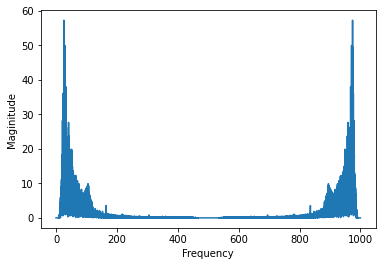

In [92]:
fft = np.fft.fft(newData, len(newData))
magnitude = np.abs(fft)
frequency = np.linspace(0, sr, len(magnitude))

plt.plot(frequency, magnitude)
plt.xlabel('Frequency')
plt.ylabel('Maginitude')
plt.show()

# Loading data

In [109]:
ds_a = pd.read_csv('training/training-a/REFERENCE.csv', names=['sound', 'stat'])
ds_b = pd.read_csv('training/training-b/REFERENCE.csv', names=['sound', 'stat'])
ds_c = pd.read_csv('training/training-c/REFERENCE.csv', names=['sound', 'stat'])
ds_d = pd.read_csv('training/training-d/REFERENCE.csv', names=['sound', 'stat'])
ds_e = pd.read_csv('training/training-e/REFERENCE.csv', names=['sound', 'stat'])
ds_f = pd.read_csv('training/training-f/REFERENCE.csv', names=['sound', 'stat'])

ds = [ds_a, ds_b, ds_c, ds_d, ds_e, ds_f]
ds = pd.concat(ds)
ds

,sound,stat
0,a0001,1
1,a0002,1
2,a0003,1
3,a0004,1
4,a0005,1
...,...,...
109,f0110,-1
110,f0111,-1
111,f0112,-1
112,f0113,-1


In [110]:
files_a = glob('training/training-a/*.wav')
files_b = glob('training/training-b/*.wav')
files_c = glob('training/training-c/*.wav')
files_d = glob('training/training-d/*.wav')
files_e = glob('training/training-e/*.wav')
files_f = glob('training/training-f/*.wav')

In [111]:
files = files_a + files_b + files_c + files_d + files_e + files_f

In [103]:
files

['training/training-a\\a0001.wav',
 'training/training-a\\a0002.wav',
 'training/training-a\\a0003.wav',
 'training/training-a\\a0004.wav',
 'training/training-a\\a0005.wav',
 'training/training-a\\a0006.wav',
 'training/training-a\\a0007.wav',
 'training/training-a\\a0008.wav',
 'training/training-a\\a0009.wav',
 'training/training-a\\a0010.wav',
 'training/training-a\\a0011.wav',
 'training/training-a\\a0012.wav',
 'training/training-a\\a0013.wav',
 'training/training-a\\a0014.wav',
 'training/training-a\\a0015.wav',
 'training/training-a\\a0016.wav',
 'training/training-a\\a0017.wav',
 'training/training-a\\a0018.wav',
 'training/training-a\\a0019.wav',
 'training/training-a\\a0020.wav',
 'training/training-a\\a0021.wav',
 'training/training-a\\a0022.wav',
 'training/training-a\\a0023.wav',
 'training/training-a\\a0024.wav',
 'training/training-a\\a0025.wav',
 'training/training-a\\a0026.wav',
 'training/training-a\\a0027.wav',
 'training/training-a\\a0028.wav',
 'training/training-

In [112]:
labs = []
train_audio = []
for file in files:
    data, rate = librosa.load(file, sr=1000)
    
    lowcut = 20.0
    highcut = 450.0

    data = butter_bandpass_filter(data, lowcut, highcut, rate)
    fname = os.path.basename(file)
    
    ID = fname.replace('.wav', '')
    CLASS = ds.loc[ds['sound'] == ID]
    
    print("{}: samples in waveform: {}".format(fname, data.size))
    
    
    train_audio.append(data)
    labs.append( CLASS.values.tolist()[0][1])
    
train_audio, labs

a0001.wav: samples in waveform: 35666
a0002.wav: samples in waveform: 20829
a0003.wav: samples in waveform: 30720
a0004.wav: samples in waveform: 35597
a0005.wav: samples in waveform: 35666
a0006.wav: samples in waveform: 20759
a0007.wav: samples in waveform: 35666
a0008.wav: samples in waveform: 35806
a0009.wav: samples in waveform: 35806
a0010.wav: samples in waveform: 35736
a0011.wav: samples in waveform: 35597
a0012.wav: samples in waveform: 30860
a0013.wav: samples in waveform: 35666
a0014.wav: samples in waveform: 35736
a0015.wav: samples in waveform: 35736
a0016.wav: samples in waveform: 30790
a0017.wav: samples in waveform: 35666
a0018.wav: samples in waveform: 20898
a0019.wav: samples in waveform: 30860
a0020.wav: samples in waveform: 35666
a0021.wav: samples in waveform: 35597
a0022.wav: samples in waveform: 36154
a0023.wav: samples in waveform: 30581
a0024.wav: samples in waveform: 20689
a0025.wav: samples in waveform: 31138
a0026.wav: samples in waveform: 35597
a0027.wav: s

a0219.wav: samples in waveform: 35597
a0220.wav: samples in waveform: 35109
a0221.wav: samples in waveform: 35597
a0222.wav: samples in waveform: 30860
a0223.wav: samples in waveform: 20689
a0224.wav: samples in waveform: 36224
a0225.wav: samples in waveform: 35597
a0226.wav: samples in waveform: 31044
a0227.wav: samples in waveform: 30651
a0228.wav: samples in waveform: 27168
a0229.wav: samples in waveform: 30790
a0230.wav: samples in waveform: 36224
a0231.wav: samples in waveform: 30860
a0232.wav: samples in waveform: 36224
a0233.wav: samples in waveform: 35666
a0234.wav: samples in waveform: 35666
a0235.wav: samples in waveform: 30581
a0236.wav: samples in waveform: 36015
a0237.wav: samples in waveform: 35597
a0238.wav: samples in waveform: 9265
a0239.wav: samples in waveform: 20898
a0240.wav: samples in waveform: 35666
a0241.wav: samples in waveform: 35597
a0242.wav: samples in waveform: 35597
a0243.wav: samples in waveform: 36224
a0244.wav: samples in waveform: 35597
a0245.wav: sa

b0030.wav: samples in waveform: 8000
b0031.wav: samples in waveform: 6986
b0032.wav: samples in waveform: 8000
b0033.wav: samples in waveform: 5306
b0034.wav: samples in waveform: 8000
b0035.wav: samples in waveform: 8000
b0036.wav: samples in waveform: 8000
b0037.wav: samples in waveform: 6852
b0038.wav: samples in waveform: 8000
b0039.wav: samples in waveform: 8000
b0040.wav: samples in waveform: 8000
b0041.wav: samples in waveform: 8000
b0042.wav: samples in waveform: 8000
b0043.wav: samples in waveform: 8000
b0044.wav: samples in waveform: 8000
b0045.wav: samples in waveform: 8000
b0046.wav: samples in waveform: 8000
b0047.wav: samples in waveform: 8000
b0048.wav: samples in waveform: 8000
b0049.wav: samples in waveform: 8000
b0050.wav: samples in waveform: 8000
b0051.wav: samples in waveform: 8000
b0052.wav: samples in waveform: 8000
b0053.wav: samples in waveform: 8000
b0054.wav: samples in waveform: 8000
b0055.wav: samples in waveform: 8000
b0056.wav: samples in waveform: 8000
b

b0256.wav: samples in waveform: 8000
b0257.wav: samples in waveform: 8000
b0258.wav: samples in waveform: 8000
b0259.wav: samples in waveform: 8000
b0260.wav: samples in waveform: 8000
b0261.wav: samples in waveform: 8000
b0262.wav: samples in waveform: 8000
b0263.wav: samples in waveform: 8000
b0264.wav: samples in waveform: 8000
b0265.wav: samples in waveform: 8000
b0266.wav: samples in waveform: 8000
b0267.wav: samples in waveform: 8000
b0268.wav: samples in waveform: 8000
b0269.wav: samples in waveform: 8000
b0270.wav: samples in waveform: 8000
b0271.wav: samples in waveform: 8000
b0272.wav: samples in waveform: 7450
b0273.wav: samples in waveform: 7282
b0274.wav: samples in waveform: 8000
b0275.wav: samples in waveform: 8000
b0276.wav: samples in waveform: 8000
b0277.wav: samples in waveform: 8000
b0278.wav: samples in waveform: 8000
b0279.wav: samples in waveform: 8000
b0280.wav: samples in waveform: 8000
b0281.wav: samples in waveform: 8000
b0282.wav: samples in waveform: 8000
b

b0478.wav: samples in waveform: 8000
b0479.wav: samples in waveform: 8000
b0480.wav: samples in waveform: 8000
b0481.wav: samples in waveform: 8000
b0482.wav: samples in waveform: 8000
b0483.wav: samples in waveform: 8000
b0484.wav: samples in waveform: 8000
b0485.wav: samples in waveform: 8000
b0486.wav: samples in waveform: 8000
b0487.wav: samples in waveform: 8000
b0488.wav: samples in waveform: 8000
b0489.wav: samples in waveform: 8000
b0490.wav: samples in waveform: 8000
c0001.wav: samples in waveform: 22723
c0002.wav: samples in waveform: 11577
c0003.wav: samples in waveform: 32648
c0004.wav: samples in waveform: 57473
c0005.wav: samples in waveform: 9649
c0006.wav: samples in waveform: 29181
c0007.wav: samples in waveform: 31655
c0008.wav: samples in waveform: 30042
c0009.wav: samples in waveform: 60258
c0010.wav: samples in waveform: 89293
c0011.wav: samples in waveform: 69037
c0012.wav: samples in waveform: 18837
c0013.wav: samples in waveform: 32119
c0014.wav: samples in wave

e00117.wav: samples in waveform: 26031
e00118.wav: samples in waveform: 21437
e00119.wav: samples in waveform: 24744
e00120.wav: samples in waveform: 47620
e00121.wav: samples in waveform: 37459
e00122.wav: samples in waveform: 10044
e00123.wav: samples in waveform: 15132
e00124.wav: samples in waveform: 17995
e00125.wav: samples in waveform: 14439
e00126.wav: samples in waveform: 14288
e00127.wav: samples in waveform: 27293
e00128.wav: samples in waveform: 46940
e00129.wav: samples in waveform: 23551
e00130.wav: samples in waveform: 10837
e00131.wav: samples in waveform: 17481
e00132.wav: samples in waveform: 12706
e00133.wav: samples in waveform: 32804
e00134.wav: samples in waveform: 44310
e00135.wav: samples in waveform: 21038
e00136.wav: samples in waveform: 17637
e00137.wav: samples in waveform: 13007
e00138.wav: samples in waveform: 34377
e00139.wav: samples in waveform: 9322
e00140.wav: samples in waveform: 23290
e00141.wav: samples in waveform: 21642
e00142.wav: samples in wav

e00330.wav: samples in waveform: 23778
e00331.wav: samples in waveform: 13189
e00332.wav: samples in waveform: 15996
e00333.wav: samples in waveform: 80277
e00334.wav: samples in waveform: 24697
e00335.wav: samples in waveform: 20990
e00336.wav: samples in waveform: 12261
e00337.wav: samples in waveform: 26697
e00338.wav: samples in waveform: 57733
e00339.wav: samples in waveform: 23301
e00340.wav: samples in waveform: 10441
e00341.wav: samples in waveform: 26514
e00342.wav: samples in waveform: 15196
e00343.wav: samples in waveform: 8713
e00344.wav: samples in waveform: 12947
e00345.wav: samples in waveform: 23260
e00346.wav: samples in waveform: 18655
e00347.wav: samples in waveform: 12157
e00348.wav: samples in waveform: 19401
e00349.wav: samples in waveform: 28264
e00350.wav: samples in waveform: 18213
e00351.wav: samples in waveform: 20174
e00352.wav: samples in waveform: 9239
e00353.wav: samples in waveform: 15919
e00354.wav: samples in waveform: 19989
e00355.wav: samples in wave

e00541.wav: samples in waveform: 37293
e00542.wav: samples in waveform: 19505
e00543.wav: samples in waveform: 22734
e00544.wav: samples in waveform: 22116
e00545.wav: samples in waveform: 84582
e00546.wav: samples in waveform: 17982
e00547.wav: samples in waveform: 22487
e00548.wav: samples in waveform: 29316
e00549.wav: samples in waveform: 11548
e00550.wav: samples in waveform: 37477
e00551.wav: samples in waveform: 21409
e00552.wav: samples in waveform: 23424
e00553.wav: samples in waveform: 41326
e00554.wav: samples in waveform: 14105
e00555.wav: samples in waveform: 16637
e00556.wav: samples in waveform: 29361
e00557.wav: samples in waveform: 14571
e00558.wav: samples in waveform: 30690
e00559.wav: samples in waveform: 19370
e00560.wav: samples in waveform: 26085
e00561.wav: samples in waveform: 25818
e00562.wav: samples in waveform: 23778
e00563.wav: samples in waveform: 15278
e00564.wav: samples in waveform: 14092
e00565.wav: samples in waveform: 15980
e00566.wav: samples in wa

e00752.wav: samples in waveform: 33327
e00753.wav: samples in waveform: 9654
e00754.wav: samples in waveform: 39047
e00755.wav: samples in waveform: 37474
e00756.wav: samples in waveform: 39136
e00757.wav: samples in waveform: 31928
e00758.wav: samples in waveform: 31183
e00759.wav: samples in waveform: 19543
e00760.wav: samples in waveform: 24984
e00761.wav: samples in waveform: 18967
e00762.wav: samples in waveform: 19000
e00763.wav: samples in waveform: 25840
e00764.wav: samples in waveform: 15679
e00765.wav: samples in waveform: 19412
e00766.wav: samples in waveform: 20341
e00767.wav: samples in waveform: 21994
e00768.wav: samples in waveform: 17363
e00769.wav: samples in waveform: 34314
e00770.wav: samples in waveform: 24925
e00771.wav: samples in waveform: 39117
e00772.wav: samples in waveform: 20111
e00773.wav: samples in waveform: 21589
e00774.wav: samples in waveform: 12311
e00775.wav: samples in waveform: 21124
e00776.wav: samples in waveform: 8319
e00777.wav: samples in wave

e00964.wav: samples in waveform: 42207
e00965.wav: samples in waveform: 12678
e00966.wav: samples in waveform: 24022
e00967.wav: samples in waveform: 9126
e00968.wav: samples in waveform: 17229
e00969.wav: samples in waveform: 19320
e00970.wav: samples in waveform: 38745
e00971.wav: samples in waveform: 33599
e00972.wav: samples in waveform: 22911
e00973.wav: samples in waveform: 41585
e00974.wav: samples in waveform: 29324
e00975.wav: samples in waveform: 16314
e00976.wav: samples in waveform: 19950
e00977.wav: samples in waveform: 26749
e00978.wav: samples in waveform: 26452
e00979.wav: samples in waveform: 39214
e00980.wav: samples in waveform: 16951
e00981.wav: samples in waveform: 37619
e00982.wav: samples in waveform: 26057
e00983.wav: samples in waveform: 18246
e00984.wav: samples in waveform: 8629
e00985.wav: samples in waveform: 16275
e00986.wav: samples in waveform: 15827
e00987.wav: samples in waveform: 17443
e00988.wav: samples in waveform: 11575
e00989.wav: samples in wave

e01178.wav: samples in waveform: 16445
e01179.wav: samples in waveform: 21081
e01180.wav: samples in waveform: 28057
e01181.wav: samples in waveform: 65727
e01182.wav: samples in waveform: 32978
e01183.wav: samples in waveform: 21720
e01184.wav: samples in waveform: 8914
e01185.wav: samples in waveform: 44907
e01186.wav: samples in waveform: 22520
e01187.wav: samples in waveform: 20647
e01188.wav: samples in waveform: 13666
e01189.wav: samples in waveform: 12839
e01190.wav: samples in waveform: 16061
e01191.wav: samples in waveform: 12226
e01192.wav: samples in waveform: 30225
e01193.wav: samples in waveform: 21109
e01194.wav: samples in waveform: 16578
e01195.wav: samples in waveform: 27083
e01196.wav: samples in waveform: 21028
e01197.wav: samples in waveform: 33214
e01198.wav: samples in waveform: 13709
e01199.wav: samples in waveform: 12524
e01200.wav: samples in waveform: 27263
e01201.wav: samples in waveform: 13938
e01202.wav: samples in waveform: 47008
e01203.wav: samples in wav

e01390.wav: samples in waveform: 27278
e01391.wav: samples in waveform: 16815
e01392.wav: samples in waveform: 25875
e01393.wav: samples in waveform: 17648
e01394.wav: samples in waveform: 13358
e01395.wav: samples in waveform: 22390
e01396.wav: samples in waveform: 36805
e01397.wav: samples in waveform: 20292
e01398.wav: samples in waveform: 20367
e01399.wav: samples in waveform: 23130
e01400.wav: samples in waveform: 24074
e01401.wav: samples in waveform: 32769
e01402.wav: samples in waveform: 14717
e01403.wav: samples in waveform: 24289
e01404.wav: samples in waveform: 26177
e01405.wav: samples in waveform: 26804
e01406.wav: samples in waveform: 19735
e01407.wav: samples in waveform: 25242
e01408.wav: samples in waveform: 16403
e01409.wav: samples in waveform: 13646
e01410.wav: samples in waveform: 19266
e01411.wav: samples in waveform: 20027
e01412.wav: samples in waveform: 29016
e01413.wav: samples in waveform: 38094
e01414.wav: samples in waveform: 24259
e01415.wav: samples in wa

e01602.wav: samples in waveform: 40817
e01603.wav: samples in waveform: 13672
e01604.wav: samples in waveform: 44292
e01605.wav: samples in waveform: 21827
e01606.wav: samples in waveform: 20282
e01607.wav: samples in waveform: 55031
e01608.wav: samples in waveform: 16675
e01609.wav: samples in waveform: 17789
e01610.wav: samples in waveform: 18845
e01611.wav: samples in waveform: 24884
e01612.wav: samples in waveform: 32291
e01613.wav: samples in waveform: 49548
e01614.wav: samples in waveform: 22741
e01615.wav: samples in waveform: 19071
e01616.wav: samples in waveform: 17671
e01617.wav: samples in waveform: 8240
e01618.wav: samples in waveform: 30498
e01619.wav: samples in waveform: 23843
e01620.wav: samples in waveform: 23277
e01621.wav: samples in waveform: 18787
e01622.wav: samples in waveform: 27813
e01623.wav: samples in waveform: 19668
e01624.wav: samples in waveform: 19787
e01625.wav: samples in waveform: 22819
e01626.wav: samples in waveform: 12028
e01627.wav: samples in wav

e01816.wav: samples in waveform: 38047
e01817.wav: samples in waveform: 21896
e01818.wav: samples in waveform: 26183
e01819.wav: samples in waveform: 15681
e01820.wav: samples in waveform: 33686
e01821.wav: samples in waveform: 21204
e01822.wav: samples in waveform: 11737
e01823.wav: samples in waveform: 19985
e01824.wav: samples in waveform: 23778
e01825.wav: samples in waveform: 15365
e01826.wav: samples in waveform: 18678
e01827.wav: samples in waveform: 23968
e01828.wav: samples in waveform: 31353
e01829.wav: samples in waveform: 43063
e01830.wav: samples in waveform: 21352
e01831.wav: samples in waveform: 16229
e01832.wav: samples in waveform: 23499
e01833.wav: samples in waveform: 22412
e01834.wav: samples in waveform: 27889
e01835.wav: samples in waveform: 21965
e01836.wav: samples in waveform: 9051
e01837.wav: samples in waveform: 13946
e01838.wav: samples in waveform: 10940
e01839.wav: samples in waveform: 29492
e01840.wav: samples in waveform: 23574
e01841.wav: samples in wav

e02027.wav: samples in waveform: 22908
e02028.wav: samples in waveform: 38021
e02029.wav: samples in waveform: 13510
e02030.wav: samples in waveform: 16765
e02031.wav: samples in waveform: 9167
e02032.wav: samples in waveform: 9497
e02033.wav: samples in waveform: 33178
e02034.wav: samples in waveform: 21395
e02035.wav: samples in waveform: 24505
e02036.wav: samples in waveform: 41577
e02037.wav: samples in waveform: 25530
e02038.wav: samples in waveform: 51213
e02039.wav: samples in waveform: 11223
e02040.wav: samples in waveform: 38951
e02041.wav: samples in waveform: 8820
e02042.wav: samples in waveform: 31927
e02043.wav: samples in waveform: 21898
e02044.wav: samples in waveform: 31293
e02045.wav: samples in waveform: 20887
e02046.wav: samples in waveform: 21111
e02047.wav: samples in waveform: 21883
e02048.wav: samples in waveform: 38831
e02049.wav: samples in waveform: 54196
e02050.wav: samples in waveform: 21050
e02051.wav: samples in waveform: 18092
e02052.wav: samples in wavef

f0100.wav: samples in waveform: 31344
f0101.wav: samples in waveform: 30960
f0102.wav: samples in waveform: 31152
f0103.wav: samples in waveform: 31728
f0104.wav: samples in waveform: 30864
f0105.wav: samples in waveform: 30336
f0106.wav: samples in waveform: 32318
f0107.wav: samples in waveform: 30576
f0108.wav: samples in waveform: 30528
f0109.wav: samples in waveform: 30768
f0110.wav: samples in waveform: 30672
f0111.wav: samples in waveform: 29376
f0112.wav: samples in waveform: 30432
f0113.wav: samples in waveform: 32976
f0114.wav: samples in waveform: 31392


([array([-1.05187632e-03, -2.24435751e-03,  1.57698480e-05, ...,
          1.37757499e-03,  2.31099985e-03,  4.24114357e-03]),
  array([0.00447654, 0.01558682, 0.01028537, ..., 0.02022462, 0.01799158,
         0.01520304]),
  array([-0.00207354, -0.00582337, -0.00470283, ...,  0.00157646,
          0.00192278,  0.00194798]),
  array([ 0.00523959,  0.0134156 ,  0.00832817, ..., -0.00262308,
         -0.00194727, -0.00166827]),
  array([-0.00077109, -0.00197491, -0.00242912, ...,  0.01913491,
          0.01556865,  0.01734181]),
  array([0.01728215, 0.05431604, 0.05639708, ..., 0.01225022, 0.01320193,
         0.01277922]),
  array([ 0.02222534,  0.05861497,  0.03853064, ..., -0.02081952,
         -0.02319139, -0.02306858]),
  array([-0.00956946, -0.02557501, -0.01886907, ...,  0.00495399,
          0.0033724 ,  0.0057397 ]),
  array([-0.00172079, -0.00536846, -0.00662385, ...,  0.00833003,
          0.00835515,  0.00403616]),
  array([-0.00076994, -0.00298363, -0.00434631, ..., -0.00163

In [115]:
L = []
for i in range(len(labs)):
    L.append((train_audio[i], labs[i]))

In [120]:
type(L)

list

# Calculating MF(Ratio of mean and max value of Fourier Trans. ) of Data

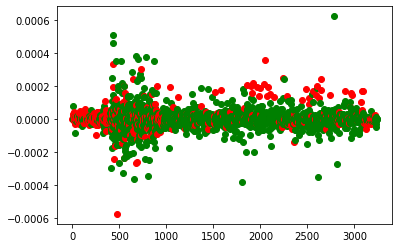

In [119]:
for i in range(len(L)):
    MF = np.mean(L[i][0])/np.max(L[i][0])
                 
    if(L[i][1] > 0):
        plt.plot(i, MF, 'o', color='red')
    else:
        plt.plot(i, MF, 'o', color='green')

plt.show()
    

In [121]:
from operator import itemgetter 

In [122]:
train_x = list(map(itemgetter(0), L)) 
train_y = list(map(itemgetter(1), L)) 

In [123]:
train_x

[array([-1.05187632e-03, -2.24435751e-03,  1.57698480e-05, ...,
         1.37757499e-03,  2.31099985e-03,  4.24114357e-03]),
 array([0.00447654, 0.01558682, 0.01028537, ..., 0.02022462, 0.01799158,
        0.01520304]),
 array([-0.00207354, -0.00582337, -0.00470283, ...,  0.00157646,
         0.00192278,  0.00194798]),
 array([ 0.00523959,  0.0134156 ,  0.00832817, ..., -0.00262308,
        -0.00194727, -0.00166827]),
 array([-0.00077109, -0.00197491, -0.00242912, ...,  0.01913491,
         0.01556865,  0.01734181]),
 array([0.01728215, 0.05431604, 0.05639708, ..., 0.01225022, 0.01320193,
        0.01277922]),
 array([ 0.02222534,  0.05861497,  0.03853064, ..., -0.02081952,
        -0.02319139, -0.02306858]),
 array([-0.00956946, -0.02557501, -0.01886907, ...,  0.00495399,
         0.0033724 ,  0.0057397 ]),
 array([-0.00172079, -0.00536846, -0.00662385, ...,  0.00833003,
         0.00835515,  0.00403616]),
 array([-0.00076994, -0.00298363, -0.00434631, ..., -0.00163488,
         0.001

In [124]:
train_y

[1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1

In [126]:
from sklearn.svm import SVC
model = SVC()

In [127]:
model.fit(train_x, train_y)

ValueError: setting an array element with a sequence.